<a href="https://colab.research.google.com/github/JUANSSE/IA-1-Project/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA_Proyecto/Dataset')
print(os.getcwd())
df = pd.read_csv('subMuestra-Accidentalidad.csv')

Mounted at /content/drive
/content/drive/My Drive/IA_Proyecto/Dataset


In [ ]:
df.shape

(70919, 13)

In [ ]:
df = df.drop(['DIRECCION_ENC','RADICADO','OBJECTID'], axis=1)

In [ ]:
df.rename(columns={'CBML':'CODIGO CBML','DIA_NOMBRE':'NOMBRE DEL DIA','DISENO':'DISEÑO','MES_NOMBRE':'NOMBRE DEL MES','TIPO_GEOCOD':'TIPO DE COORDENADA'}, inplace = True)

In [ ]:
df.head(5)

,BARRIO,CODIGO CBML,CLASE,COMUNA,DIA,NOMBRE DEL DIA,DIRECCION,DISEÑO,FECHA,GRAVEDAD,HORA,MES,NOMBRE DEL MES,PERIODO,TIPO DE COORDENADA,X,Y
0,Campo Amor,1507,Choque,Guayabal,20,JUEVES,CR 50 FF CL 9 AA,Tramo de via,2018-09-20T00:00:00.000Z,HERIDO,02:10:00 p. m.,9,SEPTIEMBRE,2018,Malla vial aproximada: CR 50-10,-75.578357,6.213719
1,Villa Flora,0715,Atropello,Robledo,21,MIÉRCOLES,CL 76 AE CR 83,Tramo de via,2018-03-21T00:00:00.000Z,HERIDO,08:30 PM,3,MARZO,2018,Malla vial,-75.592022,6.279157
2,Robledo,0717,Choque,Robledo,30,JUEVES,CR 85 CL 65,Interseccion,2018-08-30T00:00:00.000Z,SOLO DAÑOS,09:20:00 p. m.,8,AGOSTO,2018,Malla vial,-75.595882,6.275555
3,La Candelaria,1019,Choque,La Candelaria,10,LUNES,CL 49 A CR 49,Interseccion,2018-09-10T00:00:00.000Z,SOLO DAÑOS,08:50:00 a. m.,9,SEPTIEMBRE,2018,Malla vial aproximada: CL 49-49,-75.567284,6.248271
4,Manila,1419,Choque,El Poblado,12,VIERNES,CR 48 DD CL 9,Tramo de via,2018-10-12T00:00:00.000Z,SOLO DAÑOS,06:18:00 p. m.,10,OCTUBRE,2018,Malla vial aproximada: CR 48-10,-75.576195,6.213677


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35619 entries, 0 to 35618
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BARRIO              35566 non-null  object 
 1   CODIGO CBML         35577 non-null  object 
 2   CLASE               35619 non-null  object 
 3   COMUNA              35579 non-null  object 
 4   DIA                 35619 non-null  int64  
 5   NOMBRE DEL DIA      35619 non-null  object 
 6   DIRECCION           35619 non-null  object 
 7   DISEÑO              35523 non-null  object 
 8   FECHA               35619 non-null  object 
 9   GRAVEDAD            35619 non-null  object 
 10  HORA                35619 non-null  object 
 11  MES                 35619 non-null  int64  
 12  NOMBRE DEL MES      35619 non-null  object 
 13  PERIODO             35619 non-null  int64  
 14  TIPO DE COORDENADA  35619 non-null  object 
 15  X                   35619 non-null  float64
 16  Y   

In [ ]:
df = df.drop(df[df['COMUNA']=='Sin Inf'].index)

df.drop(df[df['CODIGO CBML'].isnull()].index, inplace = True)
df.drop(df[df['BARRIO'].isnull()].index,inplace = True)
df.drop(df[df['COMUNA'].isnull()].index, inplace = True)
df.drop(df[df['DISEÑO'].isnull()].index, inplace = True)
df.drop(df[df['GRAVEDAD'].isnull()].index, inplace = True)

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [ ]:
df['FECHA'] = df['FECHA'].dt.date

In [ ]:
df['HORA'] = pd.to_datetime(df['HORA'])

In [ ]:
df['HORA']

0       2021-09-28 14:10:00
1       2021-09-28 20:30:00
2       2021-09-28 21:20:00
3       2021-09-28 08:50:00
4       2021-09-28 18:18:00
                ...        
35614   2021-09-28 18:50:00
35615   2021-09-28 01:00:00
35616   2021-09-28 10:30:00
35617   2021-09-28 16:00:00
35618   2021-09-28 16:20:00
Name: HORA, Length: 35472, dtype: datetime64[ns]

In [ ]:
df['HORA'] = df['HORA'].dt.time

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [ ]:
df

,BARRIO,CODIGO CBML,CLASE,COMUNA,DIA,NOMBRE DEL DIA,DIRECCION,DISEÑO,FECHA,GRAVEDAD,HORA,MES,NOMBRE DEL MES,PERIODO,TIPO DE COORDENADA,X,Y
0,Campo Amor,1507,Choque,Guayabal,20,JUEVES,CR 50 FF CL 9 AA,Tramo de via,2018-09-20,HERIDO,14:10:00,9,SEPTIEMBRE,2018,Malla vial aproximada: CR 50-10,-75.578357,6.213719
1,Villa Flora,0715,Atropello,Robledo,21,MIÉRCOLES,CL 76 AE CR 83,Tramo de via,2018-03-21,HERIDO,20:30:00,3,MARZO,2018,Malla vial,-75.592022,6.279157
2,Robledo,0717,Choque,Robledo,30,JUEVES,CR 85 CL 65,Interseccion,2018-08-30,SOLO DAÑOS,21:20:00,8,AGOSTO,2018,Malla vial,-75.595882,6.275555
3,La Candelaria,1019,Choque,La Candelaria,10,LUNES,CL 49 A CR 49,Interseccion,2018-09-10,SOLO DAÑOS,08:50:00,9,SEPTIEMBRE,2018,Malla vial aproximada: CL 49-49,-75.567284,6.248271
4,Manila,1419,Choque,El Poblado,12,VIERNES,CR 48 DD CL 9,Tramo de via,2018-10-12,SOLO DAÑOS,18:18:00,10,OCTUBRE,2018,Malla vial aproximada: CR 48-10,-75.576195,6.213677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35614,Manrique Central No. 1,0409,Caida Ocupante,Aranjuez,10,MIÉRCOLES,CL 67 CR 48,Tramo de via,2019-04-10,HERIDO,18:50:00,4,ABRIL,2019,Malla vial,-75.557681,6.263142
35615,Loreto,0913,Otro,Buenos Aires,1,JUEVES,CR 30 CL 35,Lote o Predio,2019-08-01,HERIDO,01:00:00,8,AGOSTO,2019,Malla vial,-75.558421,6.232295
35616,Las Brisas,0502,Choque,Castilla,5,JUEVES,CR 64 C CL 104,Tramo de via,2019-09-05,HERIDO,10:30:00,9,SEPTIEMBRE,2019,Malla vial,-75.563815,6.301392
35617,Barrio Colón,1013,Otro,La Candelaria,23,MARTES,CR 44 CL 44,Tramo de via,2019-04-23,HERIDO,16:00:00,4,ABRIL,2019,Malla vial,-75.566617,6.243250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35472 entries, 0 to 35618
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   BARRIO              35472 non-null  object        
 1   CODIGO CBML         35472 non-null  object        
 2   CLASE               35472 non-null  object        
 3   COMUNA              35472 non-null  object        
 4   DIA                 35472 non-null  int64         
 5   NOMBRE DEL DIA      35472 non-null  object        
 6   DIRECCION           35472 non-null  object        
 7   DISEÑO              35472 non-null  object        
 8   FECHA               35472 non-null  datetime64[ns]
 9   GRAVEDAD            35472 non-null  object        
 10  HORA                35472 non-null  object        
 11  MES                 35472 non-null  int64         
 12  NOMBRE DEL MES      35472 non-null  object        
 13  PERIODO             35472 non-null  int64     

In [ ]:
accidentes = pd.read_csv("/content/drive/My Drive/IA_Proyecto/Dataset/X.csv", encoding = 'utf-8')

In [ ]:
accidentes['NUM_GRAVEDAD'].unique()

array([0., 1., 2.])

In [ ]:
submuestra = accidentes.sample(n=150 , random_state=1)
submuestra

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
47037,-75.561683,6.187013,719344.0,1671709.0,22.0,2019.0,6.0,5.0,9.0,0.0,1.0,0.0,213.0
16738,-75.575254,6.246314,661983.0,1631429.0,16.0,2018.0,4.0,6.0,2.0,1.0,1.0,0.0,29.0
58905,-75.564115,6.215593,731409.0,1679647.0,25.0,2019.0,2.0,7.0,9.0,0.0,1.0,0.0,19.0
47924,-75.544441,6.288942,720298.0,1676273.0,29.0,2019.0,4.0,6.0,13.0,0.0,1.0,3.0,278.0
30698,-75.587009,6.266808,677521.0,1649575.0,14.0,2018.0,6.0,11.0,12.0,1.0,1.0,0.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70908,-75.575037,6.250175,741800.0,1680479.0,31.0,2019.0,6.0,7.0,2.0,1.0,0.0,0.0,101.0
54811,-75.573364,6.276299,726745.0,1655545.0,2.0,2019.0,6.0,1.0,7.0,0.0,1.0,0.0,65.0
55061,-75.566134,6.220604,712011.0,1663903.0,14.0,2019.0,2.0,3.0,9.0,1.0,2.0,0.0,19.0
5262,-75.585887,6.248935,550223.0,1612534.0,4.0,2018.0,2.0,1.0,0.0,1.0,1.0,0.0,27.0


In [ ]:
submuestra.shape

(200, 13)

# **Regresion lineal**

In [ ]:
def estimate_bo_b1(x, y):
    
    n = np.size(x)
    
    m_x, m_y = np.mean(x), np.mean(y)
    
    Sumatoria_xy = np.sum((x-m_x)*(y-m_y))
    Sumatoria_xx = np.sum(x*(x-m_x))

    b_1 = Sumatoria_xy / Sumatoria_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0 , b_1)

In [ ]:
def plot_regression(x,y,b):
    plt.scatter(x , y , color = 'green', marker = 'o', s=30 )
    
    y_pred= b[0] + b[1]*x
    plt.plot(x, y_pred, color = 'blue',label='sin')
    
    plt.xlabel('Meses del año')
    plt.ylabel('Gravedad de accidente')
    plt.grid()

    plt.title('Gravedad con respecto a los meses del año')
 
    
    plt.show()

Los valores b0 = 0.28657071920227695, b1 =0.02489856886215458


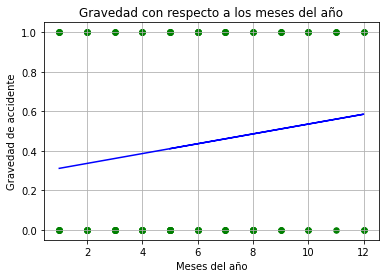

In [ ]:
def main():
    
    x = submuestra['MES']
    y = submuestra['NUM_GRAVEDAD']
    
    b = estimate_bo_b1(x,y)
    print(f'Los valores b0 = {b[0]}, b1 ={b[1]}')
    
    plot_regression(x, y, b)
    
main()

# **Forest Regressor**

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop(['NUM_GRAVEDAD','X',	'Y'],axis=1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9112967600290693
0.2389616768500606


Gran diferencia entre el valor de prueba y el valor de entrenamiento (overfitting)

# **Naive bayes**

In [ ]:
df = pd.read_csv('X.csv')
obj = pd.read_csv('accidentes_obj.csv')

In [ ]:
df = df.drop(['NUM_GRAVEDAD'],axis=1)
y = obj.drop(['FECHA',	'HORA',	'CLASE',	'DIRECCION',	'DIRECCION_ENC','CBML','TIPO_GEOCOD',	'BARRIO',	'COMUNA',	'DISENO',	'MES_NOMBRE'], axis = 1)

In [ ]:
df['clasificacion'] = y['GRAVEDAD']

In [ ]:
trainRandom = np.random.rand(len(df))< 0.8
train= df[trainRandom]
test = df[~trainRandom]
features = df.columns[:12]
features

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIA', 'PERIODO', 'DIA_SEMANA', 'MES',
       'NUM_COMUNA', 'NUM_DISENO', 'NUM_CLASE', 'NUM_BARRIO'],
      dtype='object')

In [ ]:
y_ = pd.factorize(train['clasificacion'])[0]
p = pd.DataFrame({"clase":y_})

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(train[features], y_)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf.predict(test[features])

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
preds = df.clasificacion[clf.predict(test[features])]
preds = np.array(preds[0:len(test)])

In [ ]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(test['clasificacion'], preds)
print('Precisión del modelo:\n',precision)

Precisión del modelo:
 0.6947464403450936


# **K-Means**

In [ ]:
df_accidentes = pd.read_csv("Kmeans.csv")

In [ ]:
df_accidentes.head(5)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,-75.584608,6.261152,550556.0,1612819.0,14.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-75.582266,6.293102,550557.0,1612866.0,14.0,2018.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2,-75.560337,6.252080,550558.0,1612809.0,14.0,2018.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
3,-75.597828,6.222382,550559.0,1612812.0,14.0,2018.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0
4,-75.561804,6.236754,550560.0,1612817.0,14.0,2018.0,0.0,1.0,4.0,1.0,1.0,0.0,4.0


In [ ]:
kmeans = KMeans(n_clusters=2).fit(df_accidentes)
print(f'Total de centros {len(kmeans.cluster_centers_)}')
print(f'Arreglo con la longitud {kmeans.predict(df_accidentes)}')

Total de centros 2
Arreglo con la longitud [1 1 1 ... 0 0 0]


In [ ]:
df_accidentes['group'] = kmeans.predict(df_accidentes)
df_accidentes.head(10)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO,group
0,-75.584608,6.261152,550556.0,1612819.0,14.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,-75.582266,6.293102,550557.0,1612866.0,14.0,2018.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1
2,-75.560337,6.252080,550558.0,1612809.0,14.0,2018.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0,1
3,-75.597828,6.222382,550559.0,1612812.0,14.0,2018.0,0.0,1.0,3.0,0.0,0.0,2.0,3.0,1
4,-75.561804,6.236754,550560.0,1612817.0,14.0,2018.0,0.0,1.0,4.0,1.0,1.0,0.0,4.0,1
5,-75.554249,6.262941,550562.0,1612856.0,14.0,2018.0,0.0,1.0,5.0,0.0,1.0,3.0,5.0,1
6,-75.591549,6.244591,550563.0,1612823.0,14.0,2018.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,1
7,-75.572067,6.234996,550564.0,1612825.0,14.0,2018.0,0.0,1.0,2.0,1.0,2.0,0.0,7.0,1
8,-75.599717,6.250105,550565.0,1612850.0,14.0,2018.0,0.0,1.0,6.0,1.0,1.0,0.0,8.0,1
9,-75.578964,6.288339,550566.0,1612815.0,14.0,2018.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,1


# **Clasificación de caracteristicas**

In [ ]:
df = pd.read_csv('X.csv')
obj = pd.read_csv('accidentes_obj.csv')

In [ ]:
df = df.drop(['NUM_GRAVEDAD'],axis=1)
y = obj.drop(['FECHA',	'HORA',	'CLASE',	'DIRECCION',	'DIRECCION_ENC','CBML','TIPO_GEOCOD',	'BARRIO',	'COMUNA',	'DISENO',	'MES_NOMBRE'], axis = 1)
df['clasification'] = y['GRAVEDAD']
print(df['clasification'].unique())

['HERIDO' 'SOLO DAÑOS' 'MUERTO']


In [ ]:
trainRandom = np.random.rand(len(df))< 0.8
train= df[trainRandom]
test = df[~trainRandom]

In [ ]:
features = df.columns[:12]
df.clasification.value_counts()

HERIDO        37357
SOLO DAÑOS    33326
MUERTO          236
Name: clasification, dtype: int64

In [ ]:
y_ = pd.factorize(train['clasification'])[0]
p = pd.DataFrame({"clase":y_})
p['clase'].value_counts()

1    29972
0    26629
2      195
Name: clase, dtype: int64

In [ ]:
clf = RandomForestClassifier(n_jobs=5, random_state=1)
clf.fit(train[features], y_)
clf.predict(test[features])

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
preds = df.clasification[clf.predict(test[features])]
preds = np.array(preds[0:len(test)])

In [ ]:
test['clasification'].value_counts()

HERIDO        7385
SOLO DAÑOS    6697
MUERTO          41
Name: clasification, dtype: int64

In [ ]:
from operator import itemgetter
feature  = list(sorted(zip(train[features],clf.feature_importances_),key=itemgetter(1), reverse= True))
feature

[('NUM_CLASE', 0.32413458803570167),
 ('Y', 0.10471394052034555),
 ('RADICADO', 0.10209398292667414),
 ('OBJECTID', 0.10091645332492515),
 ('X', 0.09370346738792724),
 ('DIA', 0.07360567193041004),
 ('NUM_BARRIO', 0.04618676068539873),
 ('NUM_DISENO', 0.04503921703429718),
 ('DIA_SEMANA', 0.043823754641231796),
 ('MES', 0.04029779257946584),
 ('NUM_COMUNA', 0.02109751408609197),
 ('PERIODO', 0.004386856847530706)]

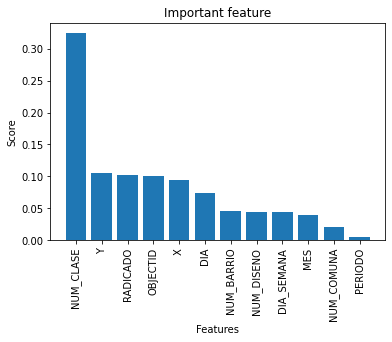

In [ ]:
feature_importances = dict(feature)

names = list(feature_importances.keys())
values = list(feature_importances.values())

plt.bar(range(len(feature_importances)),values,tick_label=names)
plt.xticks(rotation = 'vertical')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Important feature')
plt.savefig('')
plt.show()

# **Decision trees**

In [ ]:
model = DecisionTreeRegressor(max_depth = 4)

from sklearn.model_selection import train_test_split

X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop(['NUM_GRAVEDAD','X',	'Y'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

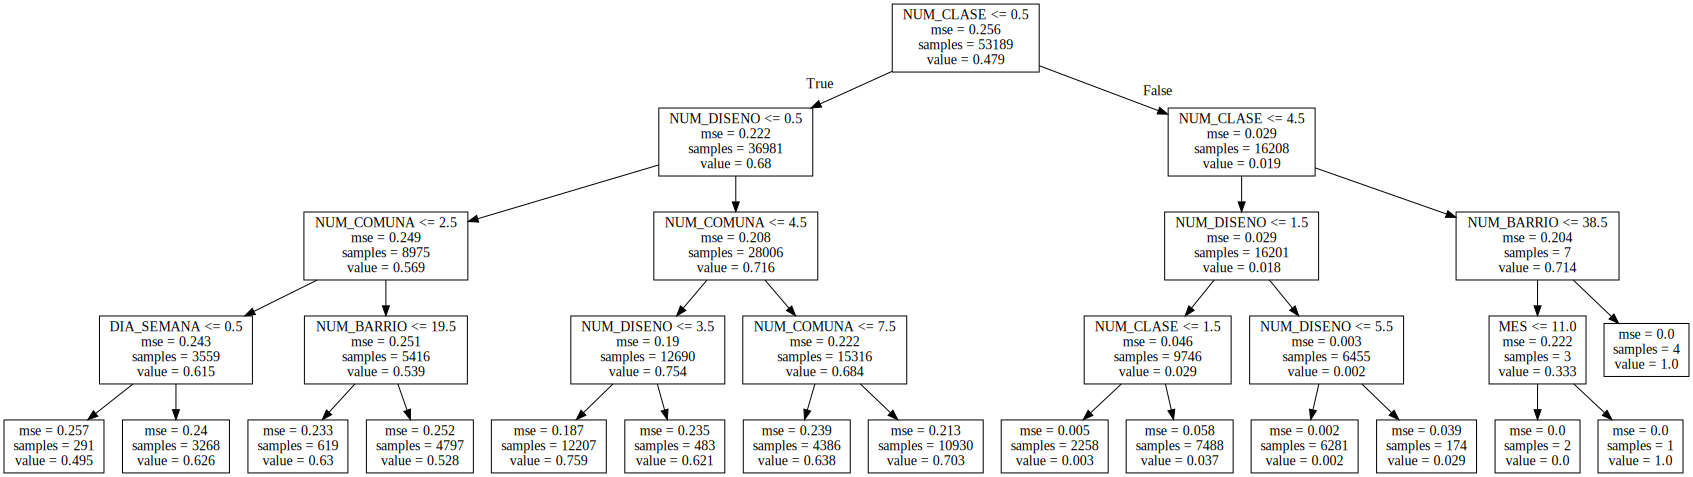

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file =None,
                          feature_names=X.columns
                         )
graphviz.Source(treedot)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9113167427652643
0.21076017231992217


# **Gradient boosted trees**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9112599664053589
0.2446334021602247


# **Optimizacion de hiperparametros**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,501,20)}

In [ ]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [ ]:
gsearch1 = GridSearchCV(estimador,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [ ]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [ ]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9112599664053589
0.2446334021602247


In [ ]:
estimador = GradientBoostingRegressor(learning_rate =0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=40)

In [ ]:
estimador.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
estimador.score(X_test, y_test)

0.38343938170684366